In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os

sys.path.insert(0, '/home/aew492/research-summer2020/code')
import globals
globals.initialize_vals()

In [2]:
data_dir = globals.data_dir
grad_dir = globals.grad_dir

In [3]:
def load_suave_amps(cat_tag, rlzs=401, m=1.0, b=0.5, basis='bao_fixed'):
    amps = np.empty((rlzs,4))
    for rlz in range(rlzs):
        suave_dict = np.load(os.path.join(grad_dir, f'suave_data/{cat_tag}/{basis}/{cat_tag}_rlz{rlz}_m-{m}00-L_b-{b}00.npy'), allow_pickle=True).item()
        amps[rlz] = suave_dict['amps']
    return amps
        

In [4]:
def load_patch_amps(cat_tag, rlzs=401, m=1.0, b=0.5, npatches=8):
    amps = np.empty((rlzs,4))
    for rlz in range(rlzs):
        patch_dict = np.load(os.path.join(grad_dir, f'patch_data/{cat_tag}/{npatches}patches/test_dir/{cat_tag}_rlz{rlz}_m-{m}00-L_b-{b}00.npy'), allow_pickle=True).item()
        amps[rlz] = patch_dict['theta'].flatten()
    return amps

### precision scalings, Weinberg OSU

In [5]:
def std_grad(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1))) * (V**(-1/3))  # last factor is from position dependence across box
    return std

In [6]:
def std_cf(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1)))
    return std

In [7]:
# input power spectrum
def load_Pk(cat_tag):
    Pk = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_pk.txt').T
    return Pk

In [8]:
# galaxy power spectrum
def load_PkG(cat_tag):
    PkG = np.loadtxt(f'/scratch/ksf293/mocks/lognormal/inputs/cat_{cat_tag}_pkG.dat').T
    return PkG

In [9]:
# Pk SHOULD be the same between cat tags, let's check:
k1, Pk1 = load_Pk('L750_n2e-4_z057_patchy_As2x')
k2, Pk2 = load_Pk('L750_n1e-4_z057_patchy_As2x')
k3, Pk3 = load_Pk('L500_n1e-4_z057_patchy_As2x')
k1x, Pk1x = load_Pk('L750_n1e-4_z057_patchy')

True
[2.4642949e+01 2.5121217e+01 2.5608766e+01 ... 6.0361440e-10 5.7000335e-10
 5.3826059e-10]


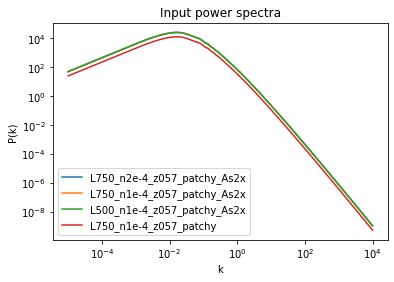

In [10]:
fig, ax = plt.subplots()

ax.plot(k1, Pk1, label='L750_n2e-4_z057_patchy_As2x')
ax.plot(k2, Pk2, label='L750_n1e-4_z057_patchy_As2x')
ax.plot(k3, Pk3, label='L500_n1e-4_z057_patchy_As2x')
ax.plot(k1x, Pk1x, label='L750_n1e-4_z057_patchy')

ax.set_title('Input power spectra')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
plt.legend()

print(Pk1.all()==Pk2.all()==Pk3.all())
print(Pk1-Pk1x)

==> Only the amplitude of the mock affects the input power spectrum.

In [11]:
k, Pk = load_Pk('L750_n2e-4_z057_patchy_As2x')
kG, PkG = load_PkG('L750_n2e-4_z057_patchy_As2x')

In [12]:
# let's naively take the value of xi at r=40
r_rep = 40
k_rep = 1/r_rep
k_rep = min(kG, key=lambda x:abs(x-k_rep))  # closest r value to 40
P_rep = PkG[np.where(kG==k_rep)]
k_rep, P_rep

(0.02511886432, array([76730.64364]))

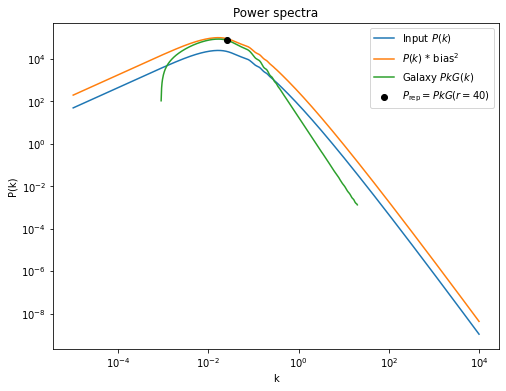

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

bias = 2.0
ax.plot(k, Pk, label='Input $P(k)$')
ax.plot(k, Pk*bias**2, label='$P(k)$ * bias$^2$')
ax.plot(kG, PkG, label='Galaxy $PkG(k)$')

ax.scatter(k_rep, P_rep, marker='o', color='k', zorder=10, label='$P_{\mathrm{rep}} = PkG(r=40)$')

ax.set_title('Power spectra')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
plt.legend()

## boxsize vs. std

In [14]:
# gradient values
m = np.array([1.0,0,0])
b = 0.5

In [15]:
# fixed basis: (some not ready yet)
# amps_baofix_L500_n1e4_z057_patchy_As2x = load_suave_amps('L500_n1e-4_z057_patchy_As2x', basis='bao_fixed')
# amps_baofix_L500_n2e4_z057_patchy_As2x = load_suave_amps('L500_n2e-4_z057_patchy_As2x', basis='bao_fixed')
amps_baofix_L750_n1e4 = load_suave_amps('L750_n1e-4_z057_patchy_As2x', basis='bao_fixed')
amps_baofix_L750_n2e4 = load_suave_amps('L750_n2e-4_z057_patchy_As2x', basis='bao_fixed')

# stds_baofix_L500_n1e4 = get_std(amps_baofix_L500_n1e4_z057_patchy_As2x)
# stds_baofix_L500_n2e4 = get_std(amps_baofix_L500_n2e4_z057_patchy_As2x)
stds_baofix_L750_n1e4 = np.std(amps_baofix_L750_n1e4, axis=0)
stds_baofix_L750_n2e4 = np.std(amps_baofix_L750_n2e4, axis=0)

#### amplitudes

In [16]:
# n1e-4
amps_L500_n1e4 = load_suave_amps('L500_n1e-4_z057_patchy_As2x')
amps_L750_n1e4 = load_suave_amps('L750_n1e-4_z057_patchy_As2x')
amps_L1000_n1e4 = load_suave_amps('L1000_n1e-4_z057_patchy_As2x')
amps_L1500_n1e4 = load_suave_amps('L1500_n1e-4_z057_patchy_As2x')

amps_n1e4 = np.array([amps_L500_n1e4, amps_L750_n1e4, amps_L1000_n1e4, amps_L1500_n1e4])

In [17]:
# n2e-4
amps_L500_n2e4 = load_suave_amps('L500_n2e-4_z057_patchy_As2x')
amps_L750_n2e4 = load_suave_amps('L750_n2e-4_z057_patchy_As2x')
amps_L1000_n2e4 = load_suave_amps('L1000_n2e-4_z057_patchy_As2x')

amps_n2e4 = np.array([amps_L500_n2e4, amps_L750_n2e4, amps_L1000_n2e4])

In [18]:
# boxsizes
Ls = np.array([500, 750, 1000, 1500])

#### standard deviations

In [19]:
stds_L500_n1e4 = np.std(amps_L500_n1e4, axis=0)
stds_L750_n1e4 = np.std(amps_L750_n1e4, axis=0)
stds_L1000_n1e4 = np.std(amps_L1000_n1e4, axis=0)
stds_L1500_n1e4 = np.std(amps_L1500_n1e4, axis=0)

stds_n1e4 = np.array([stds_L500_n1e4, stds_L750_n1e4, stds_L1000_n1e4, stds_L1500_n1e4])

stds_L500_n1e4, stds_L750_n1e4, stds_L1000_n1e4, stds_L1500_n1e4

(array([0.15110209, 0.00123705, 0.00123906, 0.00124619]),
 array([0.08461354, 0.00043507, 0.00044253, 0.0004606 ]),
 array([0.05831472, 0.0002217 , 0.00023171, 0.00021883]),
 array([3.05839254e-02, 7.60005827e-05, 7.95384509e-05, 7.89544067e-05]))

In [20]:
stds_L500_n2e4 = np.std(amps_L500_n2e4, axis=0)
stds_L750_n2e4 = np.std(amps_L750_n2e4, axis=0)
stds_L1000_n2e4 = np.std(amps_L1000_n2e4, axis=0)

stds_n2e4 = np.array([stds_L500_n2e4, stds_L750_n2e4, stds_L1000_n2e4])

stds_L500_n2e4, stds_L750_n1e4, stds_L1000_n2e4

(array([0.13826796, 0.00109048, 0.00111993, 0.00117177]),
 array([0.08461354, 0.00043507, 0.00044253, 0.0004606 ]),
 array([0.05084867, 0.00019961, 0.0002011 , 0.00020958]))

#### expected scalings

In [21]:
Ls_cont = np.logspace(np.log10(min(Ls)), np.log10(max(Ls)), 100)
scalings_L = std_grad(Ls_cont**3, 1e-4, P_rep)
scalings_L_2 = std_grad(Ls_cont**3, 2e-4, P_rep)

Text(0.5, 0.98, 'Expected scalings')

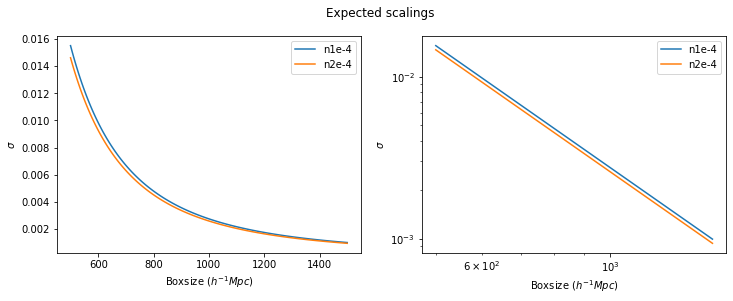

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for ax in axs:
    ax.plot(Ls_cont, scalings_L, label='n1e-4')
    ax.plot(Ls_cont, scalings_L_2, label='n2e-4')

    ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
    ax.set_ylabel('$\sigma$')
    ax.legend()

axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.suptitle('Expected scalings')

#### plot

Text(0.5, 0.98, 'Recovered CFE Amps, n1e-4_z057_patchy_As2x, 401 mocks')

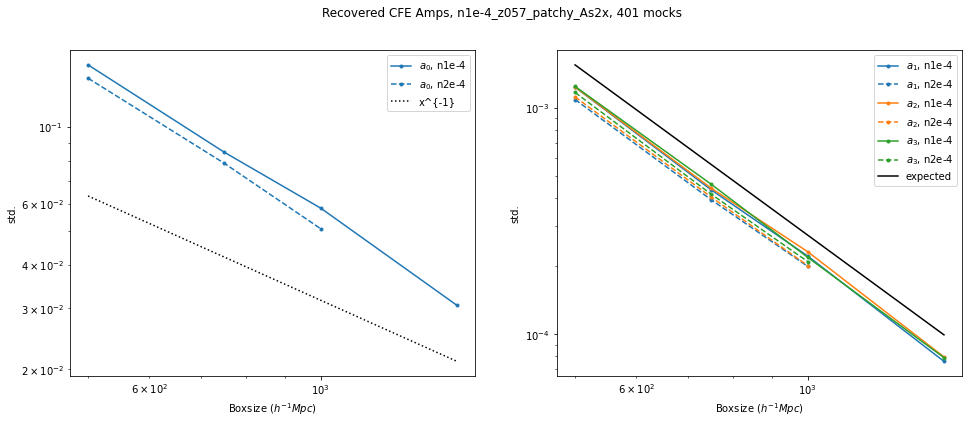

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

comps = ['$a_0$', '$a_1$', '$a_2$', '$a_3$']
Cs=['C0', 'C1', 'C2']

axs[0].plot(Ls, stds_n1e4[:,0], marker='.', color=Cs[0], label=f'{comps[0]}, n1e-4')
axs[0].plot(Ls[:3], stds_n2e4[:,0], marker='.', ls='dashed', color=Cs[0], label=f'{comps[0]}, n2e-4')

for i in range(1,4):
    axs[1].plot(Ls, stds_n1e4[:,i], marker='.', color=Cs[i-1], label=f'{comps[i]}, n1e-4')
    axs[1].plot(Ls[:3], stds_n2e4[:,i], marker='.', ls='dashed', color=Cs[i-1], label=f'{comps[i]}, n2e-4')

# scaling lines
x = np.logspace(np.log10(min(Ls)), np.log10(max(Ls)), 2)
axs[1].plot(Ls_cont, 10**-1*scalings_L, color='k', label='expected')
axs[0].plot(x, (10**1.5)*x**(-1), color='k', ls='dotted', label='x^{-1}')

for ax in axs:
    # ax.set_ylim(-0.001,0.02)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
    ax.set_ylabel('std.')
    ax.legend()
fig.suptitle('Recovered CFE Amps, n1e-4_z057_patchy_As2x, 401 mocks')

In [24]:
# plot recovered grad
grads_rec_n1 = (amps_n1e4[:,:,1:].T / amps_n1e4[:,:,0].T).T
grads_rec_n1.shape

(4, 401, 3)

In [25]:
grads_exp = np.array([m/(b*Ls[0]), m/(b*Ls[1]), m/(b*Ls[2]), m/(b*Ls[3])])
grads_exp.shape

(4, 3)

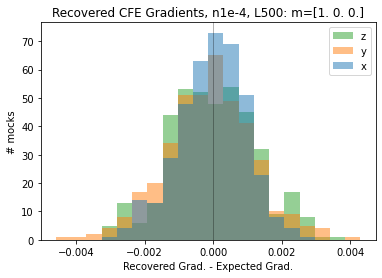

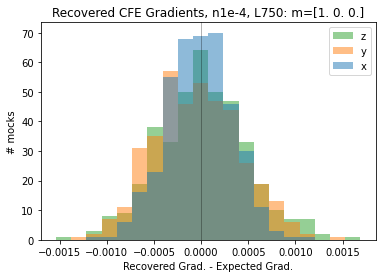

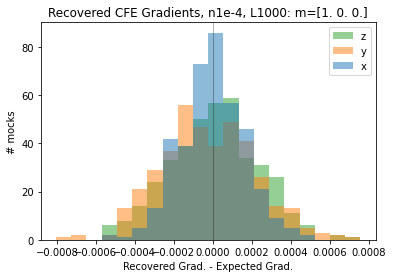

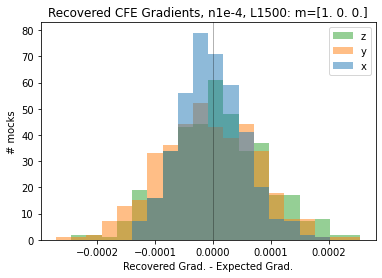

In [26]:
dims = ['x', 'y', 'z']
alpha = 0.5
for i in range(len(Ls)):
    fig, ax = plt.subplots()
    plt.hist(grads_rec_n1[i] - grads_exp[i], bins=20, alpha=alpha, histtype='stepfilled', label=dims)
    
    ax.axvline(0, color='k', alpha=0.3, lw=1)
    plt.title(f'Recovered CFE Gradients, n1e-4, L{Ls[i]}: m={m}')
    plt.xlabel('Recovered Grad. - Expected Grad.')
    plt.ylabel('# mocks')
    plt.legend()

^^Another way to visualize that we consistently recover the gradient component more precisely.

## number density vs. std

#### amplitudes

In [27]:
amps_L500_n1e4 = load_suave_amps('L500_n1e-4_z057_patchy_As2x')
amps_L500_n2e4 = load_suave_amps('L500_n2e-4_z057_patchy_As2x')
amps_L500_n4e4 = load_suave_amps('L500_n4e-4_z057_patchy_As2x')

In [28]:
amps_L750_n1e4 = load_suave_amps('L750_n1e-4_z057_patchy_As2x')
amps_L750_n2e4 = load_suave_amps('L750_n2e-4_z057_patchy_As2x')
amps_L750_n4e4 = load_suave_amps('L750_n4e-4_z057_patchy_As2x')

In [29]:
# number densities
ns = [1e-4, 2e-4, 4e-4]

#### standard deviations

In [30]:
stds_L500_n1e4 = np.std(amps_L500_n1e4, axis=0)
stds_L500_n2e4 = np.std(amps_L500_n2e4, axis=0)
stds_L500_n4e4 = np.std(amps_L500_n4e4, axis=0)

stds_L500 = np.array([stds_L500_n1e4, stds_L500_n2e4, stds_L500_n4e4])

stds_L500_n1e4, stds_L500_n2e4, stds_L500_n4e4

(array([0.15110209, 0.00123705, 0.00123906, 0.00124619]),
 array([0.13826796, 0.00109048, 0.00111993, 0.00117177]),
 array([0.13057695, 0.00102809, 0.00106662, 0.00114241]))

In [31]:
stds_L750_n1e4 = np.std(amps_L750_n1e4, axis=0)
stds_L750_n2e4 = np.std(amps_L750_n2e4, axis=0)
stds_L750_n4e4 = np.std(amps_L750_n4e4, axis=0)

stds_L750 = np.array([stds_L750_n1e4, stds_L750_n2e4, stds_L750_n4e4])

stds_L750_n1e4, stds_L750_n2e4, stds_L750_n4e4

(array([0.08461354, 0.00043507, 0.00044253, 0.0004606 ]),
 array([0.07860692, 0.0003933 , 0.00040424, 0.00041628]),
 array([0.07486796, 0.00039627, 0.00039426, 0.00040521]))

#### expected scalings

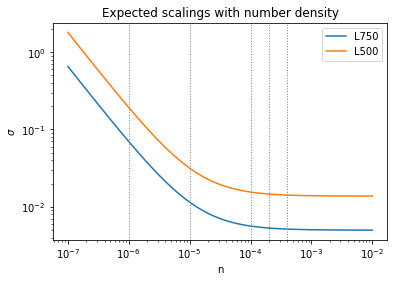

In [32]:
ns_big = np.logspace(np.log10(1e-7), np.log10(1e-2), 100)
scalings_n_big = std_grad(750**3, ns_big, P_rep)
scalings_n_500 = std_grad(500**3, ns_big, P_rep)

ns_full = np.array([1e-6, 1e-5, 1e-4, 2e-4, 4e-4])

fig, ax = plt.subplots()

plt.plot(ns_big, scalings_n_big, label='L750')
plt.plot(ns_big, scalings_n_500, label='L500')

for i in ns_full:
    ax.axvline(i, color='grey', ls='dotted', lw=1)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('n')
ax.set_ylabel('$\sigma$')
ax.set_title('Expected scalings with number density')
plt.legend()

In [33]:
ns_cont = np.logspace(np.log10(min(ns)), np.log10(max(ns)), 100)
scalings_n = std_grad(500**3, ns_cont, P_rep)

#### plot

Text(0.5, 0.98, 'Recovered CFE Amps, L500_z057_patchy_As2x, 401 mocks')

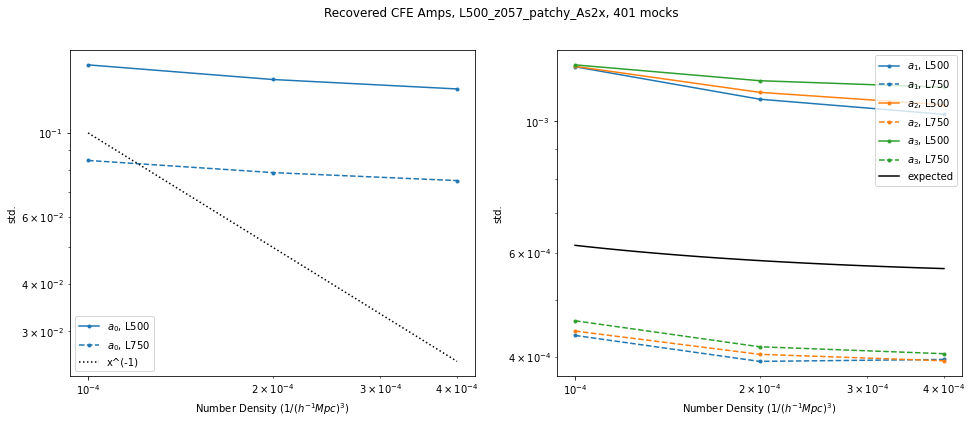

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))

comps = ['$a_0$', '$a_1$', '$a_2$', '$a_3$']
Cs=['C0', 'C1', 'C2']

axs[0].plot(ns, stds_L500[:,0], marker='.', color=Cs[0], label=f'{comps[0]}, L500')
axs[0].plot(ns, stds_L750[:,0], marker='.', color=Cs[0], ls='dashed', label=f'{comps[0]}, L750')

for i in range(1,4):
    axs[1].plot(ns, stds_L500[:,i], marker='.', color=Cs[i-1], label=f'{comps[i]}, L500')
    axs[1].plot(ns[:3], stds_L750[:,i], marker='.', color=Cs[i-1], ls='dashed', label=f'{comps[i]}, L750')

# scalings
x = np.linspace(min(ns), max(ns), 2)
axs[1].plot(ns_cont, 10**-1.4*scalings_n, color='k', label='expected')
# axs[1].plot(x, (10**(-3)*x**(0)), color='k', ls='dotted', label=f'x^(0)')
axs[0].plot(x, (10**(-5))*x**(-1), color='k', ls='dotted', label=f'x^(-1)')

for ax in axs:
    # ax.set_ylim(-0.001,0.02)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Number Density ($1/(h^{-1}Mpc)^3$)')
    ax.set_ylabel('std.')
    ax.legend()
fig.suptitle('Recovered CFE Amps, L500_z057_patchy_As2x, 401 mocks')

## gradient strength vs. std

In [35]:
ms = np.linspace(0, 1.0, 201)

In [36]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'
amps_mrange = np.empty((201,4))
for i in range(len(ms)): 
    suave_dict = np.load(os.path.join(grad_dir, f'suave_data/{cat_tag}/bao_iterative/{cat_tag}_rlz0_m-{ms[i]:.3f}-L_b-{b}00.npy'), allow_pickle=True).item()
    amps_mrange[i] = suave_dict['amps']

In [37]:
grads_rec = (amps_mrange[:,1:].T / amps_mrange[:,0]).T
grads_rec.shape

(201, 3)

In [38]:
stds_grads_rec = np.std(grads_rec, axis=0)
stds_grads_rec

array([0.00076841, 0.00022003, 0.00018246])

In [39]:
grads_exp = np.array([ms / (b*750), np.zeros(201), np.zeros(201)]).T
grads_exp.shape

(201, 3)

In [40]:
err = grads_rec - grads_exp

In [41]:
fit_x = np.polyfit(ms, err[:,0], deg=1)
fit_y = np.polyfit(ms, err[:,1], deg=1)
fit_z = np.polyfit(ms, err[:,2], deg=1)

In [42]:
fit_x, fit_y, fit_z

(array([-8.55270952e-05,  1.04586497e-05]),
 array([ 0.00037183, -0.0002075 ]),
 array([-5.24208461e-05,  3.41776108e-04]))

Text(0.5, 1.0, 'Recovered CFE Gradients, L750_n1e-4_z057_patchy_As2x')

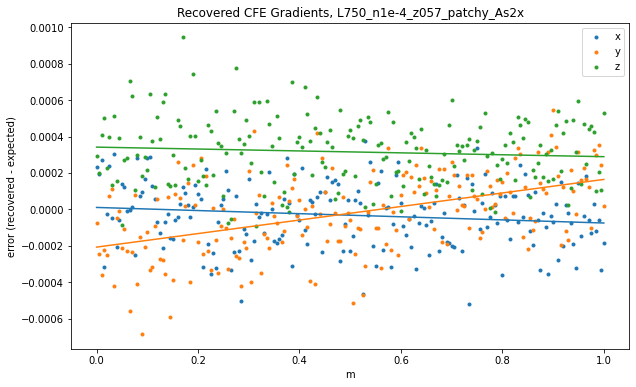

In [43]:
fig, axs = plt.subplots(figsize=(10,6))

# plt.plot(ms, grads_rec, marker='.', label='rec')
# plt.plot(ms, grads_exp, marker='.', label='exp')
plt.scatter(ms, err[:,0], marker='.', color='C0', label='x')
plt.scatter(ms, err[:,1], marker='.', color='C1', label='y')
plt.scatter(ms, err[:,2], marker='.', color='C2', label='z')

plt.plot(ms, fit_x[1]+ms*fit_x[0], color='C0')
plt.plot(ms, fit_y[1]+ms*fit_y[0], color='C1')
plt.plot(ms, fit_z[1]+ms*fit_z[0], color='C2')

x = np.linspace(min(ms), max(ms), 2)
# axs[1].plot(x, (10**(-5)*x**(-.5)), color='k', ls='dotted', label=f'x^(-.5)')

# ax.set_ylim(-0.001,0.02)
plt.xlabel('m')
plt.ylabel('error (recovered - expected)')
plt.legend()
plt.title(f'Recovered CFE Gradients, {cat_tag}')

## scalings with patches method

### boxsize

In [44]:
Ls = np.array([500, 750, 1000, 1500])

In [45]:
# n1e-4, standard
amps_L500_n1e4_p = load_patch_amps('L500_n1e-4_z057_patchy_As2x')
amps_L750_n1e4_p = load_patch_amps('L750_n1e-4_z057_patchy_As2x')
amps_L1000_n1e4_p = load_patch_amps('L1000_n1e-4_z057_patchy_As2x')
amps_L1500_n1e4_p = load_patch_amps('L1500_n1e-4_z057_patchy_As2x')

amps_n1e4_p = np.array([amps_L500_n1e4_p, amps_L750_n1e4_p, amps_L1000_n1e4_p, amps_L1500_n1e4_p])

In [46]:
# n1e-4, CFE
amps_L500_n1e4_s = amps_L500_n1e4
amps_L750_n1e4_s = amps_L750_n1e4
amps_L1000_n1e4_s = amps_L1000_n1e4
amps_L1500_n1e4_s = amps_L1500_n1e4

amps_n1e4_s = np.array([amps_L500_n1e4_s, amps_L750_n1e4_s, amps_L1000_n1e4_s, amps_L1500_n1e4_s])

In [47]:
amps_n1e4_p.shape

(4, 401, 4)

In [48]:
# divide positional components by the first constant term to get gradient values:
grads_rec_n1e4_p = (amps_n1e4_p[:,:,1:].T / amps_n1e4_p[:,:,0].T).T
grads_rec_n1e4_s = (amps_n1e4_s[:,:,1:].T / amps_n1e4_s[:,:,0].T).T

In [49]:
grads_rec_n1e4_p.shape

(4, 401, 3)

In [50]:
m = np.array([1.0,0,0])
m = np.reshape(m, (len(m), 1))  # we need to 'pad' this array to make the matrix multiplication work
b = 0.5
grads_exp = (m / (b*Ls)).T
grads_exp.shape

(4, 3)

In [51]:
# standard deviations
stds_grads_rec_n1e4_p = np.std(grads_rec_n1e4_p, axis=1)
stds_grads_rec_n1e4_s = np.std(grads_rec_n1e4_s, axis=1)
stds_grads_rec_n1e4_p.shape

(4, 3)

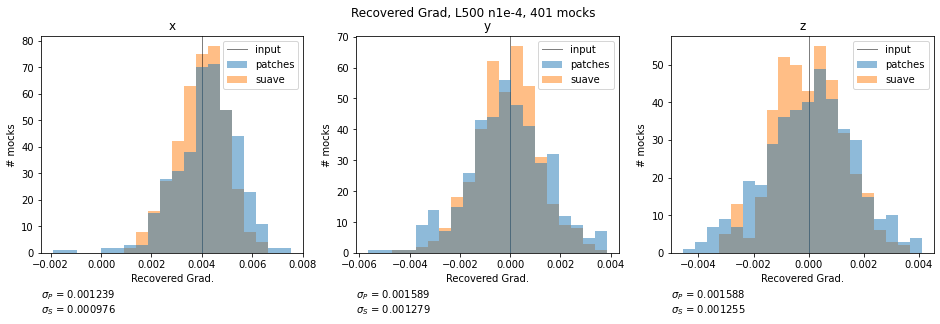

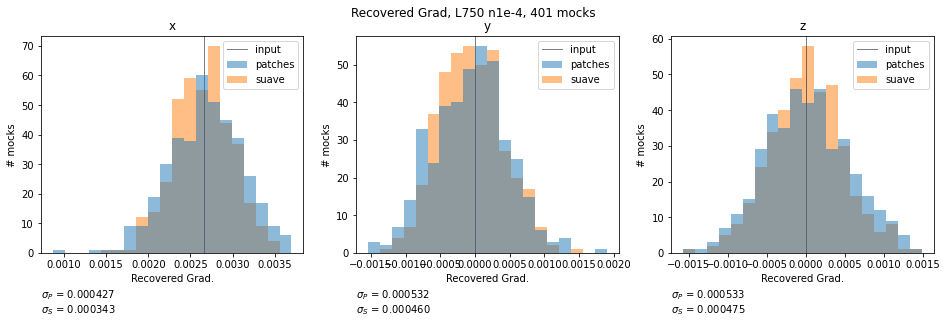

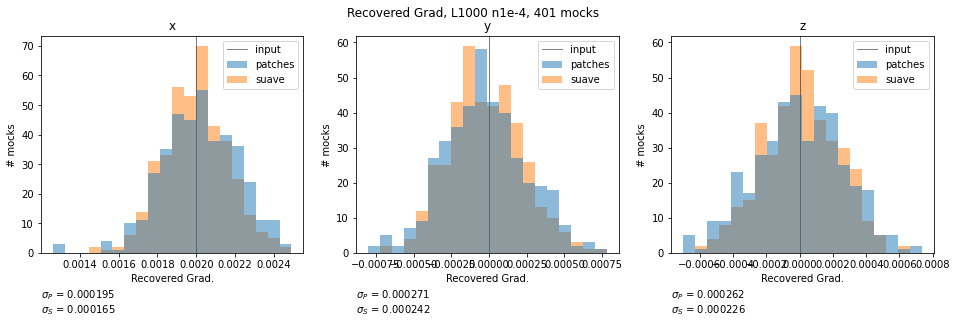

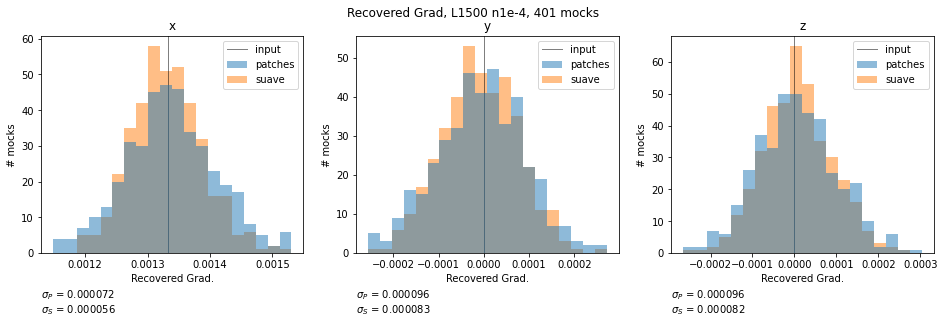

In [52]:
comps = ['x', 'y', 'z']

for L in range(len(Ls)):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    for i in range(len(comps)):
        _, bins, _ = axs[i].hist(grads_rec_n1e4_p[L,:,i], bins=20, alpha=0.5, histtype='stepfilled', label='patches', zorder=10)
        axs[i].hist(grads_rec_n1e4_s[L,:,i], bins=bins, alpha=0.5, histtype='stepfilled', label='suave')

        axs[i].axvline(grads_exp[L,i], color='k', alpha=0.5, lw=1, label='input')
        axs[i].annotate(f'$\sigma_P$ = {stds_grads_rec_n1e4_p[L,i]:.6f}', (0,0), (0,-45), xycoords='axes points')
        axs[i].annotate(f'$\sigma_S$ = {stds_grads_rec_n1e4_s[L,i]:.6f}', (0,0), (0,-60), xycoords='axes points')

        axs[i].set_title(comps[i])
        axs[i].set_xlabel('Recovered Grad.')
        axs[i].set_ylabel('# mocks')
        axs[i].legend()

    fig.suptitle(f'Recovered Grad, L{Ls[L]} n1e-4, 401 mocks')

^^The CFE recovers the gradient more precisely than the standard method in every case above.

( Do we need more patches to be fairer to the standard ? Currently only using 8 )

Text(0.5, 1.0, 'Recovered Gradients, n1e-4_z057_patchy_As2x, 401 mocks')

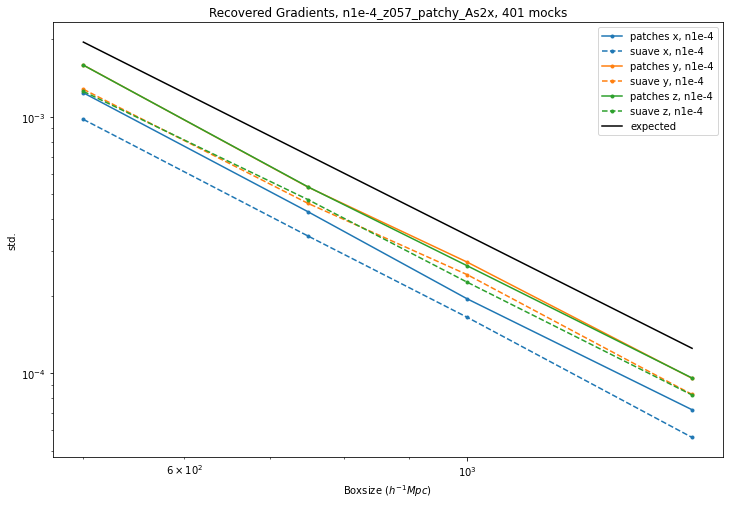

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

comps = ['x', 'y', 'z']
Cs = ['C0', 'C1', 'C2']

for i in range(3):
    ax.plot(Ls, stds_grads_rec_n1e4_p[:,i], marker='.', color=Cs[i], label=f'patches {comps[i]}, n1e-4')
    ax.plot(Ls, stds_grads_rec_n1e4_s[:,i], marker='.', color=Cs[i], ls='dashed', label=f'suave {comps[i]}, n1e-4')

# scaling lines
x = np.linspace(min(Ls), max(Ls), 2)
ax.plot(Ls_cont, 10**-.9*scalings_L, color='k', label='expected')
# ax.plot(x, (10**1.5)*x**(-1), color='k', ls='dotted', label=f'x^(-1)')

# ax.set_ylim(-0.001,0.02)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
ax.set_ylabel('std.')
ax.legend()
ax.set_title('Recovered Gradients, n1e-4_z057_patchy_As2x, 401 mocks')

Good visualisation of the more precise recovery in the direction of the gradient

### number density

In [54]:
ns = np.array(['1e-6', '1e-5', '1e-4', '2e-4', '4e-4'])

In [55]:
# L500, standard
amps_L500_n1e6_p = load_patch_amps('L500_n1e-6_z057_patchy_As2x')
amps_L500_n1e5_p = load_patch_amps('L500_n1e-5_z057_patchy_As2x')
amps_L500_n1e4_p = load_patch_amps('L500_n1e-4_z057_patchy_As2x')
amps_L500_n2e4_p = load_patch_amps('L500_n2e-4_z057_patchy_As2x')
amps_L500_n4e4_p = load_patch_amps('L500_n4e-4_z057_patchy_As2x')

amps_L500_p = np.array([amps_L500_n1e6_p, amps_L500_n1e5_p, amps_L500_n1e4_p, amps_L500_n2e4_p, amps_L500_n4e4_p])

In [56]:
# L500, CFE ==> not all ready yet
amps_L500_n1e6_s = load_suave_amps('L500_n1e-6_z057_patchy_As2x', basis='bao_fixed')
amps_L500_n1e5_s = load_suave_amps('L500_n1e-5_z057_patchy_As2x', basis='bao_fixed')
amps_L500_n1e4_s = load_suave_amps('L500_n1e-4_z057_patchy_As2x', basis='bao_fixed')
amps_L500_n2e4_s = load_suave_amps('L500_n2e-4_z057_patchy_As2x', basis='bao_fixed')
amps_L500_n4e4_s = load_suave_amps('L500_n4e-4_z057_patchy_As2x', basis='bao_fixed')

amps_L500_s = np.array([amps_L500_n1e6_s, amps_L500_n1e5_s, amps_L500_n1e4_s, amps_L500_n2e4_s, amps_L500_n4e4_s])

In [57]:
# divide positional components by the first constant term to get gradient values:
grads_rec_L500_p = (amps_L500_p[:,:,1:].T / amps_L500_p[:,:,0].T).T
grads_rec_L500_s = (amps_L500_s[:,:,1:].T / amps_L500_s[:,:,0].T).T

In [58]:
m = np.array([1.0,0,0])
grad_exp = m / (b*500)

In [59]:
# standard deviations
stds_grads_rec_L500_p = np.std(grads_rec_L500_p, axis=1)
stds_grads_rec_L500_s = np.std(grads_rec_L500_s, axis=1)

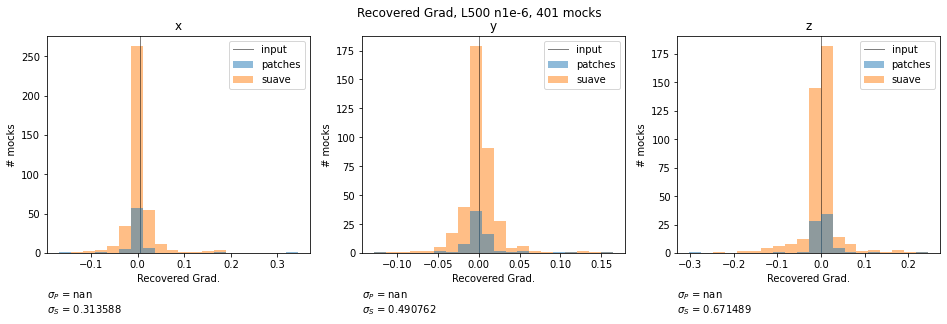

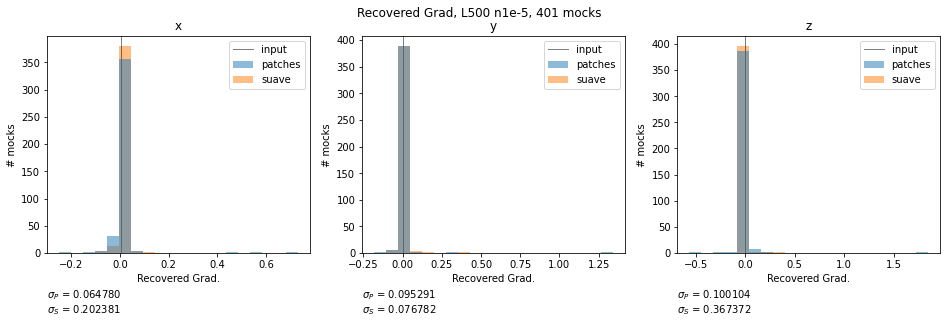

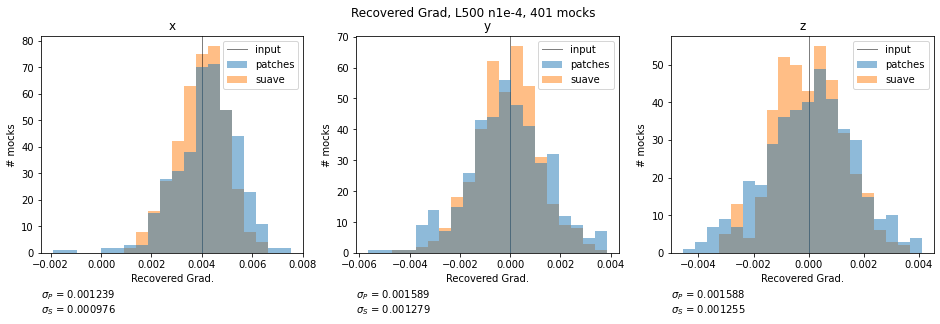

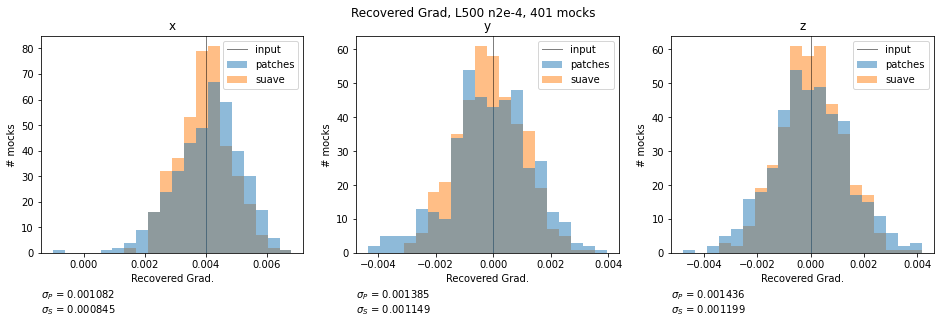

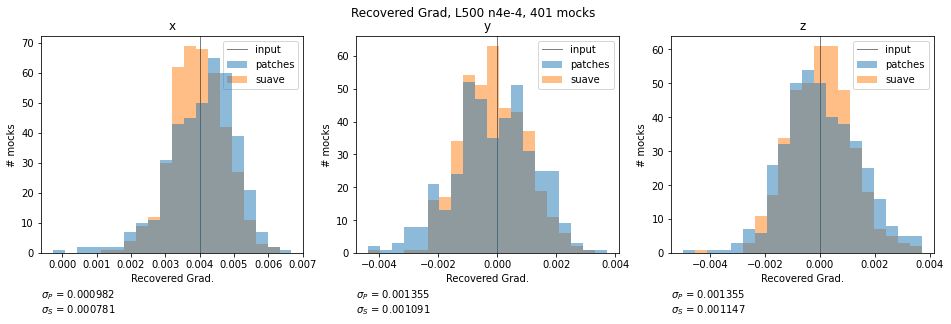

In [60]:
comps = ['x', 'y', 'z']

for n in range(len(ns)):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    for i in range(len(comps)):
        _, bins, _ = axs[i].hist(grads_rec_L500_p[n,:,i], bins=20, alpha=0.5, histtype='stepfilled', label='patches', zorder=10)
        axs[i].hist(grads_rec_L500_s[n,:,i], bins=bins, alpha=0.5, histtype='stepfilled', label='suave')

        axs[i].axvline(grad_exp[i], color='k', alpha=0.5, lw=1, label='input')
        axs[i].annotate(f'$\sigma_P$ = {stds_grads_rec_L500_p[n,i]:.6f}', (0,0), (0,-45), xycoords='axes points')
        axs[i].annotate(f'$\sigma_S$ = {stds_grads_rec_L500_s[n,i]:.6f}', (0,0), (0,-60), xycoords='axes points')

        axs[i].set_title(comps[i])
        axs[i].set_xlabel('Recovered Grad.')
        axs[i].set_ylabel('# mocks')
        axs[i].legend()

    fig.suptitle(f'Recovered Grad, L500 n{ns[n]}, 401 mocks')

#### investigate L500 n1e-5—why are the recovered grads so bad

Text(0.5, 0.98, 'Recovered Grad, L500 n1e-5, 401 mocks')

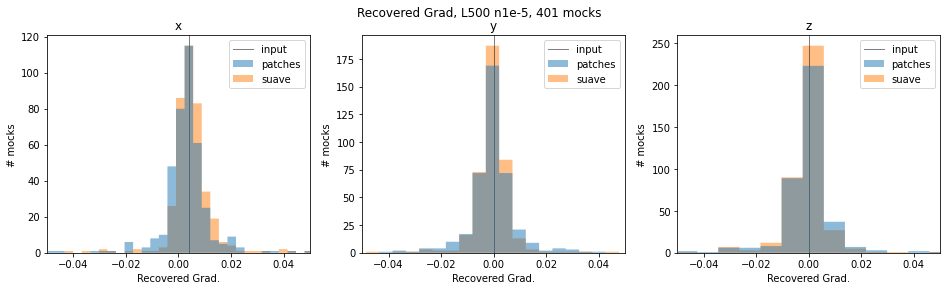

In [61]:
fig, axs = plt.subplots(1,3,figsize=(16,4))
for i in range(3):
    _, bins, _ = axs[i].hist(grads_rec_L500_p[1,:,i], bins=300, alpha=0.5, histtype='stepfilled', label='patches', zorder=10)
    axs[i].hist(grads_rec_L500_s[1,:,i], bins=bins, alpha=0.5, histtype='stepfilled', label='suave')
    
    axs[i].set_xlim(-.05,.05)
    axs[i].axvline(grad_exp[i], color='k', alpha=0.5, lw=1, label='input')
    axs[i].set_title(comps[i])
    axs[i].set_xlabel('Recovered Grad.')
    axs[i].set_ylabel('# mocks')
    axs[i].legend()
    
fig.suptitle(f'Recovered Grad, L500 n{ns[1]}, 401 mocks')

In [62]:
print("max recovered grads for patches, x y z:")
print(max(grads_rec_L500_p[1,:,0]), max(grads_rec_L500_p[1,:,1]), max(grads_rec_L500_p[1,:,2]))
print("min recovered grads for patches, x y z:")
print(min(grads_rec_L500_p[1,:,0]), min(grads_rec_L500_p[1,:,1]), min(grads_rec_L500_p[1,:,2]))

max recovered grads for patches, x y z:
0.7303370290772058 1.3417655245314466 1.846960389163947
min recovered grads for patches, x y z:
-0.24906072455077777 -0.1805696486021651 -0.5651005912834199


In [63]:
print("max recovered grads for suave, x y z:")
print(max(grads_rec_L500_s[1,:,0]), max(grads_rec_L500_s[1,:,1]), max(grads_rec_L500_s[1,:,2]))
print("min recovered grads for suave, x y z:")
print(min(grads_rec_L500_s[1,:,0]), min(grads_rec_L500_s[1,:,1]), min(grads_rec_L500_s[1,:,2]))

max recovered grads for suave, x y z:
0.10528370012629981 0.3871525912833705 7.352662311628921
min recovered grads for suave, x y z:
-4.045590122621098 -1.4393260157814523 -0.07588688532707642


#### compare to L500 n1e-4

In [64]:
print("max recovered grads for patches, x y z:")
print(max(grads_rec_L500_p[2,:,0]), max(grads_rec_L500_p[2,:,1]), max(grads_rec_L500_p[2,:,2]))
print("min recovered grads for patches, x y z:")
print(min(grads_rec_L500_p[2,:,0]), min(grads_rec_L500_p[2,:,1]), min(grads_rec_L500_p[2,:,2]))

max recovered grads for patches, x y z:
0.007553231456146466 0.003836613864449189 0.004100517947721877
min recovered grads for patches, x y z:
-0.001913265024491099 -0.005666154797882389 -0.004558678574521814


#### investigate L500 n1e-6—why there are so few recovered grads

In [65]:
a = np.isnan(grads_rec_L500_p[0,:,0])
vals = [x for x in a if not x]
len(vals)

72

^^Only 72 actual recovered values for L500, n1e-6

#### expected scalings

In [66]:
ns = [float(n) for n in ns]

In [67]:
ns_cont = np.logspace(np.log10(min(ns)), np.log10(max(ns)), 100)
scalings_n = std_grad(500**3, ns_cont, P_rep)

In [68]:
ns

[1e-06, 1e-05, 0.0001, 0.0002, 0.0004]

In [69]:
stds_grads_rec_L500_p

array([[       nan,        nan,        nan],
       [0.06478024, 0.09529052, 0.1001039 ],
       [0.00123946, 0.00158941, 0.0015882 ],
       [0.00108189, 0.00138519, 0.00143587],
       [0.0009823 , 0.00135535, 0.00135459]])

Text(0.5, 1.0, 'Recovered Gradients, n1e-4_z057_patchy_As2x, 401 mocks')

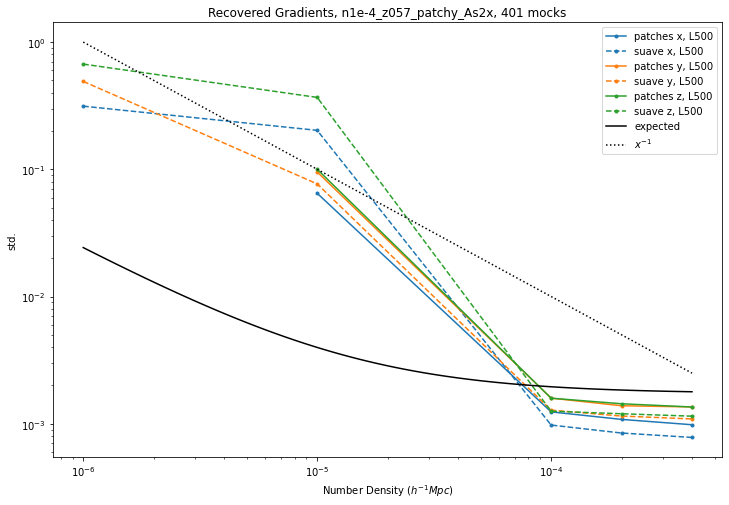

In [70]:
fig, ax = plt.subplots(figsize=(12,8))

comps = ['x', 'y', 'z']
Cs = ['C0', 'C1', 'C2']

for i in range(3):
    ax.plot(ns, stds_grads_rec_L500_p[:,i], marker='.', color=Cs[i], label=f'patches {comps[i]}, L500')
    ax.plot(ns, stds_grads_rec_L500_s[:,i], marker='.', color=Cs[i], ls='dashed', label=f'suave {comps[i]}, L500')

# scaling lines
x = np.linspace(min(ns), max(ns), 2)
ax.plot(ns_cont, 10**-.9*scalings_n, color='k', label='expected')
ax.plot(x, (10**-6)*x**(-1), color='k', ls='dotted', label='$x^{-1}$')

# ax.set_ylim(-0.001,0.02)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number Density ($h^{-1}Mpc$)')
ax.set_ylabel('std.')
ax.legend()
ax.set_title('Recovered Gradients, n1e-4_z057_patchy_As2x, 401 mocks')

### precision scalings of full mock cfs (no gradient calculation)

In [71]:
def get_cfarr_vals(cf_arr):
    arr_len = len(cf_arr[0])
    cfs_mean = np.zeros(arr_len)
    stds = np.zeros(arr_len)
    error_regions = np.empty((arr_len, 2))
    for i in range(arr_len):
        mean, std = np.mean(cf_arr[:,i]), np.std(cf_arr[:,i])
        cfs_mean[i] = mean
        stds[i] = std
        error_regions[i] = [mean-std, mean+std]
    return cfs_mean, stds, error_regions

In [72]:
cat_tag = 'L750_n1e-4_z057_patchy_As2x'

In [73]:
nmocks = 401
nbins = 22
cf_arr = np.empty((nmocks,nbins))
for i in range(nmocks):
    r, xi = np.load(os.path.join(data_dir, f'lognormal/xi/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_lognormal.npy'), allow_pickle=True)
    cf_arr[i] = xi

In [74]:
cfs_mean, stds, error_regions = get_cfarr_vals(cf_arr)

Text(0.5, 1.0, 'Landy-Szalay results, L750_n1e-4_z057_patchy_As2x 401 lognormal mocks (no gradient)')

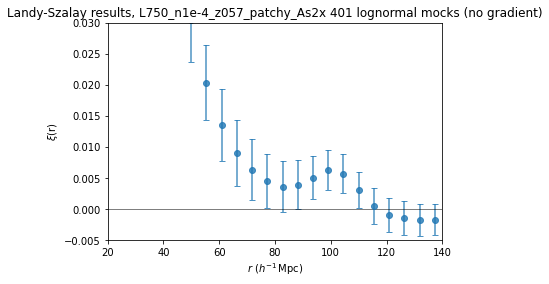

In [75]:
fig, ax = plt.subplots()

ax.errorbar(r, cfs_mean, yerr=stds, alpha=0.8, fmt='o', capsize=3, label=f'L-S lognormal')

ax.set_xlim(20, 140)
ax.set_ylim(-.005, 0.03)
plt.axhline(0, color="k", alpha=0.5, lw=1)
ax.set_xlabel(r'$r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'$\xi$(r)')
ax.set_title(f'Landy-Szalay results, {cat_tag} {nmocks} lognormal mocks (no gradient)')

In [76]:
r

array([ 22.72727273,  28.18181818,  33.63636364,  39.09090909,
        44.54545455,  50.        ,  55.45454545,  60.90909091,
        66.36363636,  71.81818182,  77.27272727,  82.72727273,
        88.18181818,  93.63636364,  99.09090909, 104.54545455,
       110.        , 115.45454545, 120.90909091, 126.36363636,
       131.81818182, 137.27272727])

In [77]:
# take a representative length scale
stds[np.where(r==50)]/cfs_mean[np.where(r==50)]

array([0.22130907])

In [78]:
stds

array([0.01726901, 0.01321688, 0.00999392, 0.00856864, 0.00784997,
       0.00671713, 0.0060102 , 0.00575173, 0.0053225 , 0.00488542,
       0.00433923, 0.00408245, 0.00388578, 0.00348221, 0.00318897,
       0.00313119, 0.00294456, 0.00288575, 0.00272146, 0.00268832,
       0.00258963, 0.00249745])

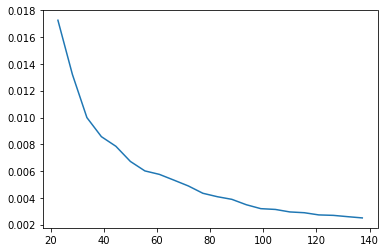

In [79]:
plt.plot(r,stds)

In [80]:
cat_tag = 'L750_n2e-4_z057_patchy_As2x'
cf_arr = np.empty((nmocks,nbins))
for i in range(nmocks):
    r, xi = np.load(os.path.join(data_dir, f'lognormal/xi/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{i}_lognormal.npy'), allow_pickle=True)
    cf_arr[i] = xi

In [81]:
cfs_mean, stds, error_regions = get_cfarr_vals(cf_arr)

In [82]:
np.mean(stds), np.median(stds)

(0.00499702474018101, 0.0035967118799250936)

### spread of $a_0$

In [83]:
Ls = ['500', '750', '1000']
ns = ['1e-4', '2e-4']

In [84]:
amp_data = []

for L in Ls:
    for i, n in enumerate(ns):
        cat_tag = f'L{L}_n{n}_z057_patchy_As2x'
        amps = load_suave_amps(cat_tag)
        a0s = amps[:,0]
        std = np.std(a0s)
        amp_dict = {
            'L' : L,
            'n' : n,
            'cat_tag' : cat_tag,
            'amps' : amps,
            'a0s' : a0s,
            'std' : std
        }
        amp_data.append(amp_dict)

In [85]:
spread_a0_n1 = []
spread_a0_n2 = []
for data in amp_data:
    if data['n'] == '1e-4':
        spread_a0_n1.append(data['std'])
    elif data['n'] == '2e-4':
        spread_a0_n2.append(data['std'])

In [86]:
Ls = np.array([float(L) for L in Ls])

In [87]:
scalings = std_cf(Ls**3, 2e-4, P_rep)

### compare spread in $a_0$ to spread in binned estimator

In [88]:
cf_arrs = np.empty((len(ns), len(Ls), nmocks, nbins))
cfs_mean = np.empty((len(ns), len(Ls), nbins))
cfs_stds = np.empty(cfs_mean.shape)

for i, n in enumerate(ns):
    for j, L in enumerate(Ls):
        cat_tag = f'L{int(L)}_n{str(n)}_z057_patchy_As2x'
        cf_arr = np.empty((nmocks,nbins))
        for k in range(nmocks):
            r, xi = np.load(os.path.join(data_dir, f'lognormal/xi/ls/{cat_tag}/xi_ls_3x_{cat_tag}_rlz{k}_lognormal.npy'), allow_pickle=True)
            cf_arr[k] = xi
        
        cfs_mean[i,j,:], cfs_stds[i,j,:], _ = get_cfarr_vals(cf_arr)
        
        cf_arrs[i,j,:,:] = cf_arr

In [89]:
cfs_stds.shape

(2, 3, 22)

In [90]:
r_rep = r[2]
spreads_ls = np.empty((len(ns), len(Ls)))
for i in range(len(spreads_ls)):
    spreads_ls[i] = cfs_stds[i,:,np.where(r==r_rep)]/cfs_mean[i,:,np.where(r==r_rep)]

In [91]:
spreads_ls.shape

(2, 3)

In [92]:
spreads_a0 = np.vstack((spread_a0_n1, spread_a0_n2))
spreads_a0.shape

(2, 3)

0.15110208511904194
0.17576564646699533


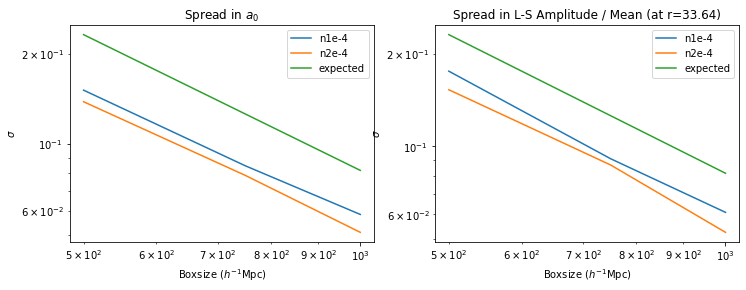

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for i in range(len(ns)):
    axs[0].plot(Ls, spreads_a0[i], label=f'n{ns[i]}')
    axs[1].plot(Ls, spreads_ls[i], label=f'n{ns[i]}')

axs[0].set_title('Spread in $a_0$')
axs[1].set_title(f'Spread in L-S Amplitude / Mean (at r={r_rep:.2f})')

for ax in axs:
    ax.plot(Ls, 10**(-1.5)*scalings, label='expected')
    ax.set_xlabel('Boxsize ($h^{-1}$Mpc)')
    ax.set_ylabel('$\sigma$')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend()

print(spreads_a0[0,0])
print(spreads_ls[0,0])

### suave precision scalings, m=1, fixed basis

In [94]:
ns = ['2e-5', '4e-5', '1e-4', '2e-4', '4e-4']
Ls = [500, 750]

In [95]:
stds_a0 = np.empty((len(Ls), len(ns)))
stds_a = np.empty((len(Ls), len(ns), 3))

for i, L in enumerate(Ls):
    stds_L_a0 = np.zeros(len(ns))
    stds_L = np.zeros((len(ns), 3))
    for j, n in enumerate(ns):
        cat_tag = f'L{L}_n{n}_z057_patchy_As2x'
        amps = load_suave_amps(cat_tag)
        a0s = amps[:,0]
        a = (amps[:,1:].T / a0s.T).T
        stds_L_a0[j] = np.std(a0s)
        stds_L[j] = np.std(a, axis=0)
    stds_a0[i] = stds_L_a0
    stds_a[i] = stds_L

In [96]:
stds_grads_rec_L500_s[:2,0].shape

(2,)

In [97]:
stds_a.shape

(2, 5, 3)

In [98]:
ns = [1e-6, 1e-5, 2e-5, 4e-5, 1e-4, 2e-4, 4e-4]
plot_data_500 = np.concatenate((stds_grads_rec_L500_s[:2,0], stds_a[0,:,0]))
plot_data_500.shape

(7,)

In [99]:
# test the effect of different power spectrum values
def get_P(r_rep):
    k_rep = 1/r_rep
    k_rep = min(kG, key=lambda x:abs(x-k_rep))  # closest r value to r_rep
    P_rep = PkG[np.where(kG==k_rep)]
    return P_rep

Text(0.5, 1.0, 'CFE Precision of Recovered Gradients, 401 mocks')

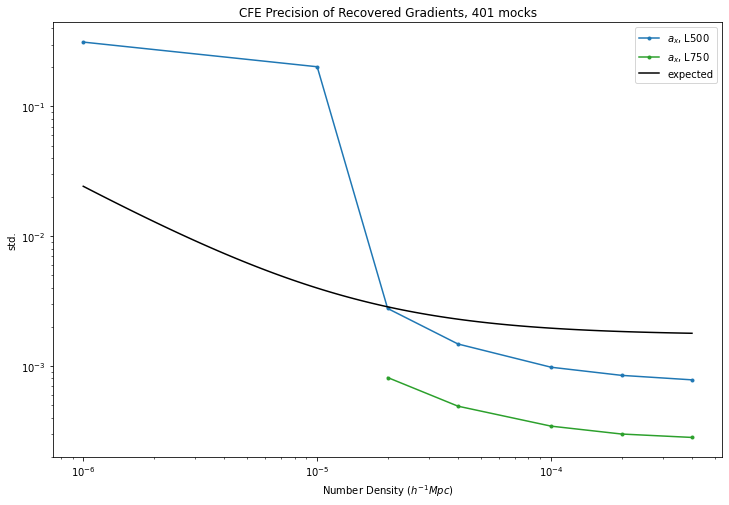

In [100]:
fig, ax = plt.subplots(figsize=(12,8))

# ax.plot(ns, stds_a0[i], marker='.', color=Cs[i], alpha=0.5, label=f'$a_0$, L{L}')
ax.plot(ns, plot_data_500, marker='.', color='C0', alpha=1, label=f'$a_x$, L500')
ax.plot(ns[2:], stds_a[1,:,0], marker='.', color='C2', alpha=1, label=f'$a_x$, L750')

# scaling lines
x = np.linspace(min(ns), max(ns), 2)
ax.plot(ns_cont, 10**-.9*scalings_n, color='k', label='expected')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number Density ($h^{-1}Mpc$)')
ax.set_ylabel('std.')
ax.legend()
ax.set_title(f'CFE Precision of Recovered Gradients, {nmocks} mocks')